In [1]:
import pandas as pd

data = pd.read_csv(
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
)

print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [20]:
# EDA
# Descriptive Analysis

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [21]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [22]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

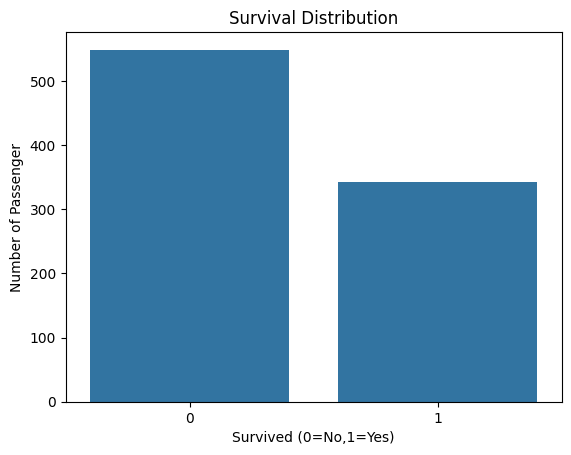

In [24]:
sns.countplot(x="Survived", data=data)
plt.title("Survival Distribution")
plt.xlabel("Survived (0=No,1=Yes)")
plt.ylabel("Number of Passenger")
plt.show()

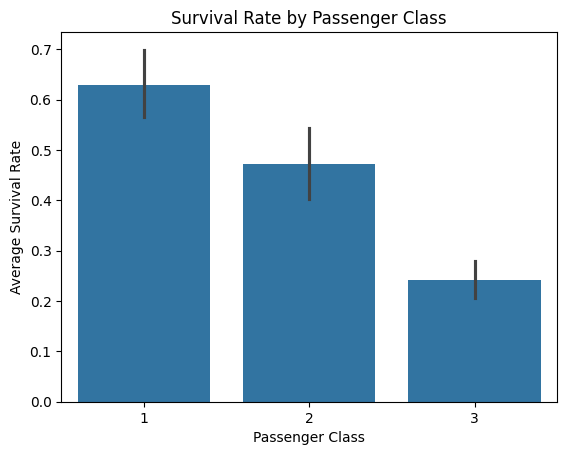

In [25]:
sns.barplot(x="Pclass", y="Survived", data=data)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Average Survival Rate")
plt.show()

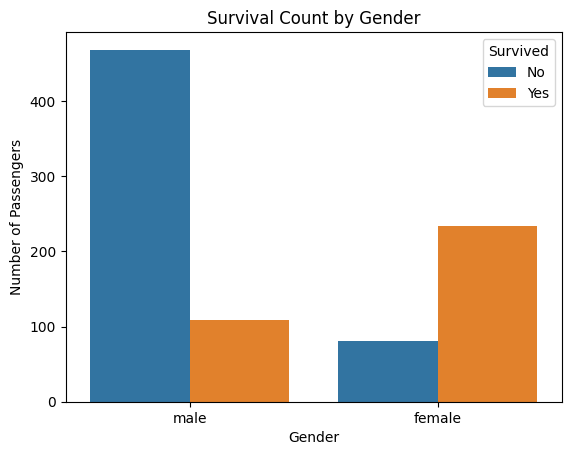

In [26]:
sns.countplot(x="Sex", hue="Survived", data=data)
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

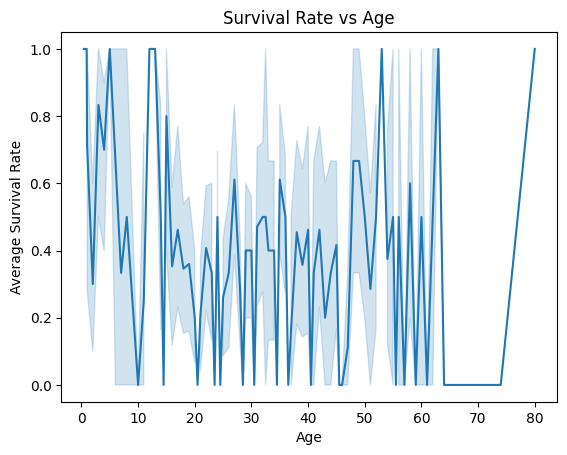

In [27]:
sns.lineplot(x="Age", y="Survived", data=data)
plt.title("Survival Rate vs Age")
plt.xlabel("Age")
plt.ylabel("Average Survival Rate")
plt.show()

In [ ]:
data["Age"] = data["Age"].fillna(data["Age"].median())

data = data.drop("Cabin", axis=1)

data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

data["Sex"] = data["Sex"].map({"male": 1, "female": 0})

S


In [29]:
features = ["Survived", "Pclass", "Sex", "Age"]

X = data[features]

y = data["Survived"]

print(X)

     Survived  Pclass  Sex   Age
0           0       3    1  22.0
1           1       1    0  38.0
2           1       3    0  26.0
3           1       1    0  35.0
4           0       3    1  35.0
..        ...     ...  ...   ...
886         0       2    1  27.0
887         1       1    0  19.0
888         0       3    0  28.0
889         1       1    1  26.0
890         0       3    1  32.0

[891 rows x 4 columns]


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

Confusion Matrix: 
 [[105   0]
 [  0  74]]
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [33]:
# Saved the model
import pickle

pickle.dump(model, open("titanic.pkl", "wb"))